In [1]:
import os

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
from scipy import sparse

In [2]:
palette = {'CNT':'#1f77b4',
 'DCT1':'#ff7f0e',
 'DCT2':'#279e68',
 'TL':'#279e68',
 'DCT':'#279e68',
 'ENDO':'#d62728',
 'FIB':'#aa40fc',
 'ICA':'#8c564b',
 'ICB':'#e377c2',
 'LEUK':'#b5bd61',
 'MES_FIB':'#17becf',
 'MES':'#17becf',
 'PC':'#aec7e8',
 'PEC':'#ffbb78',
 'PODO':'#98df8a',
 'PT':'#ff9896',
 'PT_VCAM1':'#c5b0d5',
 'TAL':'#c49c94',
 'Unclassified':'#808080',
 'Unknown':'#000000',
 'Low_Quality_RNA':'#808080'}

In [3]:
sample_code_dict = {'HCA_55_ref':'lib_55',
 '20-687_N':'lib_09',
 '21-016':'lib_16',
 'PRECISE-945420':'lib_420',
 '21-020':'lib_20',
 'HCA_51_ref':'lib_51',
 'PRECISE165536-000-003-N':'lib_03',
 '21-015':'lib_15',
 'PRECISE_023_N':'lib_23',
 '21-019':'lib_19',
 '56-ref':'lib_56',
 'PRECISE-943776':'lib_776',
 '20-688_N':'lib_10',
 'PRECISE_34':'lib_34',
 'PRECISE_38':'lib_38',
 '57-ref':'lib_57',
 'HCA_29_ref':'lib_29',
 'PRECISE_36':'lib_36',
 '20-668_N':'lib_68',
 '20-649_N':'lib_49'}

In [4]:
sample_code_dict_5p = {'HK-036':'lib_36',
                   'HK-038':'lib_38',
                   'HK-688':'lib_10',
                   'HK-687':'lib_09'}

In [5]:
sample_color_dic = sns.color_palette('tab20')
def comparison_heatmap(adata, key1, key2, label_1=None, label_2=None, cmap = 'Reds', annot = True, figsize=(7,7)):
    if label_1==None:
        label_1=key1
    if label_2==None:
        label_2=key2
    expected_df = adata.obs[[key1,key2]].groupby(by=[key2,key1]).size().reset_index(name = 'count')
    counts = np.array(expected_df['count'].tolist())
    df = pd.DataFrame(counts.reshape(((len(adata.obs[key2].cat.categories),len(adata.obs[key1].cat.categories)))), index = expected_df[key2].unique(), columns = expected_df[key1].unique())
    if annot ==True:
        annot_ = df.astype(int)
        sc.settings.set_figure_params(figsize=figsize, color_map='gist_earth')
    else:
        annot_=None
        sc.settings.set_figure_params(figsize=figsize, color_map='gist_earth')
    s = sns.heatmap(df/np.sum(df,axis = 0), cbar_kws={'label': '% cell shared between annotations'}, cmap=cmap, vmax=1, vmin=0, annot = annot_,  fmt='.7g')
    s.set_ylabel(label_2, fontsize=12)
    s.set_xlabel(label_1, fontsize = 12)
    return df

def n_cells_histogram(adata, sample_key='sample', sample_color_dic = sample_color_dic):
    df = pd.DataFrame(adata.obs[sample_key].value_counts().index, index = adata.obs[sample_key].value_counts().index  , columns =[ sample_key ])
    df['n_cells'] = adata.obs[sample_key].value_counts().values.astype(int)
    df.reindex(index=np.argsort(df['n_cells']).index.tolist()[::-1]).plot(kind='bar', x = sample_key, y ='n_cells', color = sample_color_dic, title = 'Total nº of Cells' )

In [6]:
adata = sc.read('objects/Integration_2ndQC_NEW.h5ad')

In [7]:
adata.obs

sample    batch  n_counts  n_genes_by_counts  \
AAAGAACAGGTAAAGG-1-0-scRNA    lib_55    scRNA    1583.0                785   
AAAGTCCCAATCGAAA-1-0-scRNA    lib_55    scRNA    6136.0               2394   
AACAAGAAGACCTTTG-1-0-scRNA    lib_55    scRNA    2563.0                792   
AACCAACGTATCCCTC-1-0-scRNA    lib_55    scRNA    1546.0                477   
AAGACTCAGGTAAACT-1-0-scRNA    lib_55    scRNA    1222.0                310   
...                              ...      ...       ...                ...   
TTTCCTCTCGGAAACG-1-3-scRNA5p  lib_09  scRNA5p   14882.0               3069   
TTTGCGCAGTGGCACA-1-3-scRNA5p  lib_09  scRNA5p    1799.0                599   
TTTGGTTCAATCCGAT-1-3-scRNA5p  lib_09  scRNA5p    1563.0                773   
TTTGGTTTCAAAGTAG-1-3-scRNA5p  lib_09  scRNA5p    1460.0                698   
TTTGTCAGTCACAAGG-1-3-scRNA5p  lib_09  scRNA5p    1628.0                759   

                              total_counts  total_counts_mt  pct_counts_mt  \
AAAGAACAGGTAAAGG-1-0-scRNA          1583.0            661.0      41.756161   
AAAGTCCCAATCGAAA-1-0-scRNA          6136.0           1248.0      20.338982   
AACAAGAAGACCTTTG-1-0-scRNA          2563.0           1532.0      59.773701   
AACCAACGTATCCCTC-1-0-scRNA          1546.0            889.0      57.503235   
AAGACTCAGGTAAACT-1-0-scRNA          1222.0            767.0      62.765957   
...                                    ...              ...            ...   
TTTCCTCTCGGAAACG-1-3-scRNA5p       14882.0           5019.0      33.725307   
TTTGCGCAGTGGCACA-1-3-scRNA5p        1799.0            807.0      44.858257   
TTTGGTTCAATCCGAT-1-3-scRNA5p        1563.0             68.0       4.350608   
TTTGGTTTCAAAGTAG-1-3-scRNA5p        1460.0            171.0      11.712329   
TTTGTCAGTCACAAGG-1-3-scRNA5p        1628.0            349.0      21.437347   

                              total_counts_rb  pct_counts_rb  \
AAAGAACAGGTAAAGG-1-0-scRNA               72.0       4.548326   
AAAGTCCCAATCGAAA-1-0-scRNA              872.0      14.211212   
AACAAGAAGACCTTTG-1-0-scRNA              146.0       5.696449   
AACCAACGTATCCCTC-1-0-scRNA              120.0       7.761966   
AAGACTCAGGTAAACT-1-0-scRNA              138.0      11.292962   
...                                       ...            ...   
TTTCCTCTCGGAAACG-1-3-scRNA5p             25.0       0.167988   
TTTGCGCAGTGGCACA-1-3-scRNA5p              3.0       0.166759   
TTTGGTTCAATCCGAT-1-3-scRNA5p              2.0       0.127959   
TTTGGTTTCAAAGTAG-1-3-scRNA5p              1.0       0.068493   
TTTGTCAGTCACAAGG-1-3-scRNA5p              2.0       0.122850   

                             Deepscore_external  
AAAGAACAGGTAAAGG-1-0-scRNA         Unclassified  
AAAGTCCCAATCGAAA-1-0-scRNA         Unclassified  
AACAAGAAGACCTTTG-1-0-scRNA         Unclassified  
AACCAACGTATCCCTC-1-0-scRNA         Unclassified  
AAGACTCAGGTAAACT-1-0-scRNA         Unclassified  
...                                         ...  
TTTCCTCTCGGAAACG-1-3-scRNA5p                 PT  
TTTGCGCAGTGGCACA-1-3-scRNA5p                 PT  
TTTGGTTCAATCCGAT-1-3-scRNA5p                 PT  
TTTGGTTTCAAAGTAG-1-3-scRNA5p                 PT  
TTTGTCAGTCACAAGG-1-3-scRNA5p                 PT  

[179290 rows x 10 columns]

# ADDS DOUBLETS INFORMATION adata

## scRNA Doublets

In [21]:
list(sample_code_dict.keys())

['HCA_55_ref',
 '20-687_N',
 '21-016',
 'PRECISE-945420',
 '21-020',
 'HCA_51_ref',
 'PRECISE165536-000-003-N',
 '21-015',
 'PRECISE_023_N',
 '21-019',
 '56-ref',
 'PRECISE-943776',
 '20-688_N',
 'PRECISE_34',
 'PRECISE_38',
 '57-ref',
 'HCA_29_ref',
 'PRECISE_36',
 '20-668_N',
 '20-649_N']

In [25]:
for i in list(sample_code_dict.keys()):
    adata_ = sc.read(f'../CZI_scRNAseq_Raw_Data/{i}/Doublets_Detection.h5ad')
    lib_number= adata[adata.obs['batch'].isin(['scRNA'])][adata[adata.obs['batch'].isin(['scRNA'])].obs['sample'].isin([sample_code_dict[i]])].obs.index[0].split('-')[2]
    print(i, lib_number)
    adata_.obs.index = [index + '-' + lib_number + '-' + 'scRNA' for index in adata_.obs.index]
    adata_ = adata_[adata_.obs.index.isin(adata.obs.index)]
    print(adata_.obs['doublets'].sum())
    adata.obs.loc[adata_.obs.index,'Doublet_Detection_doublets_scRNA'] = adata_.obs['doublets'].tolist()
    # adata.obs['singlets'] = ~doublets.astype(bool)
    adata.obs.loc[adata_.obs.index,'Doublet_Detection_doublets_score_scRNA'] = adata_.obs['doublets_score'].tolist()

    # adata.obs.loc[adata[adata.obs['sample'].isin([sample_code_dict[i]])].obs.index,'doublets_score'] = adata_.obs['doublets_score'].tolist()


HCA_55_ref 0
837.0
20-687_N 1
563.0
21-016 2
0.0
PRECISE-945420 3
0.0
21-020 4
3115.0
HCA_51_ref 5
0.0
PRECISE165536-000-003-N 6
0.0
21-015 7
0.0
PRECISE_023_N 8
1506.0
21-019 9
152.0
56-ref 10
0.0
PRECISE-943776 11
154.0
20-688_N 12
0.0
PRECISE_34 13
407.0
PRECISE_38 14
2277.0
57-ref 15
0.0
HCA_29_ref 16
0.0
PRECISE_36 17
4427.0
20-668_N 18
14.0
20-649_N 19
9.0


In [26]:
adata.raw = adata.copy()

In [27]:
adata.write('objects/Integration_2ndQC_metadata.h5ad', compression='gzip')

## scRNA5p Doublets

In [5]:
adata = sc.read('objects/Integration_2ndQC_metadata.h5ad')

In [9]:
list(sample_code_dict_5p.keys())

['HK-036', 'HK-038', 'HK-688', 'HK-687']

In [12]:
adata[adata.obs['batch'].isin(['scRNA5p'])][adata[adata.obs['batch'].isin(['scRNA5p'])].obs['sample'].isin([sample_code_dict_5p['HK-036']])].obs.index

Index(['AAACCTGGTTTGTTGG-1-0-scRNA5p', 'AAAGATGGTCTAGGTT-1-0-scRNA5p',
       'AACTCTTTCAGTACGT-1-0-scRNA5p', 'ACCTTTAGTCTCTCTG-1-0-scRNA5p',
       'ACGGGCTCATGGTTGT-1-0-scRNA5p', 'ATCCGAAAGCCCAGCT-1-0-scRNA5p',
       'CACATTTAGTTGAGAT-1-0-scRNA5p', 'CACCTTGAGTCCATAC-1-0-scRNA5p',
       'CACCTTGAGTGCCAGA-1-0-scRNA5p', 'CAGCAGCGTTATCGGT-1-0-scRNA5p',
       ...
       'TTAGGCATCCCTCTTT-1-0-scRNA5p', 'TTCGAAGCATCAGTCA-1-0-scRNA5p',
       'TTCGGTCCATCAGTAC-1-0-scRNA5p', 'TTCTTAGCAAGCGAGT-1-0-scRNA5p',
       'TTCTTAGCAAGTACCT-1-0-scRNA5p', 'TTGCCGTTCAGCTCGG-1-0-scRNA5p',
       'TTGGAACTCAGGCAAG-1-0-scRNA5p', 'TTTGCGCCAGTAAGCG-1-0-scRNA5p',
       'TTTGTCACAATGAAAC-1-0-scRNA5p', 'TTTGTCAGTTCACCTC-1-0-scRNA5p'],
      dtype='object', length=3259)

In [20]:
adata_.obs

n_genes  sample  doublets  singlets  \
AAACCTGCAGGGATTG-1-3-scRNA5p      680  lib_09       0.0      True   
AAACCTGCATAAAGGT-1-3-scRNA5p      604  lib_09       0.0      True   
AAACCTGGTTTGTTGG-1-3-scRNA5p      518  lib_09       0.0      True   
AAACCTGTCAGGATCT-1-3-scRNA5p      570  lib_09       0.0      True   
AAACGGGCATGCATGT-1-3-scRNA5p     1721  lib_09       0.0      True   
...                               ...     ...       ...       ...   
TTTGGTTTCAAAGTAG-1-3-scRNA5p      698  lib_09       0.0      True   
TTTGTCAAGTCGTTTG-1-3-scRNA5p     2302  lib_09       0.0      True   
TTTGTCACACACCGAC-1-3-scRNA5p      239  lib_09       0.0      True   
TTTGTCACACATGACT-1-3-scRNA5p     2759  lib_09       0.0      True   
TTTGTCAGTCACAAGG-1-3-scRNA5p      759  lib_09       0.0      True   

                              doublets_score  
AAACCTGCAGGGATTG-1-3-scRNA5p        2.736992  
AAACCTGCATAAAGGT-1-3-scRNA5p        1.789325  
AAACCTGGTTTGTTGG-1-3-scRNA5p        1.681608  
AAACCTGTCAGGATCT-1-3-scRNA5p        0.521752  
AAACGGGCATGCATGT-1-3-scRNA5p        2.228949  
...                                      ...  
TTTGGTTTCAAAGTAG-1-3-scRNA5p        0.587635  
TTTGTCAAGTCGTTTG-1-3-scRNA5p        2.228949  
TTTGTCACACACCGAC-1-3-scRNA5p        1.526673  
TTTGTCACACATGACT-1-3-scRNA5p        3.954728  
TTTGTCAGTCACAAGG-1-3-scRNA5p        1.789325  

[1179 rows x 5 columns]

In [19]:
for i in list(sample_code_dict_5p.keys()):
    adata_ = sc.read(f'../CZI_scRNA_5p_Raw_Data/raw/{i}/Doublets_Detection.h5ad')
    lib_number= adata[adata.obs['batch'].isin(['scRNA5p'])][adata[adata.obs['batch'].isin(['scRNA5p'])].obs['sample'].isin([sample_code_dict_5p[i]])].obs.index[0].split('-')[2]
    print(i, lib_number)
    adata_.obs.index = [index + '-' + lib_number + '-' + 'scRNA5p' for index in adata_.obs.index]
    adata_ = adata_[adata_.obs.index.isin(adata.obs.index)]
    print(adata_.obs['doublets'].sum())
    adata.obs.loc[adata_.obs.index,'Doublet_Detection_doublets_scRNA5p'] = adata_.obs['doublets'].tolist()
    # adata.obs['singlets'] = ~doublets.astype(bool)
    adata.obs.loc[adata_.obs.index,'Doublet_Detection_doublets_score_scRNA5p'] = adata_.obs['doublets_score'].tolist()

    # adata.obs.loc[adata[adata.obs['sample'].isin([sample_code_dict[i]])].obs.index,'doublets_score'] = adata_.obs['doublets_score'].tolist()


HK-036 0
0.0
HK-038 1
0.0
HK-688 2
0.0
HK-687 3
0.0


In [ ]:
adata.raw = adata.copy()

In [ ]:
adata.write('objects/Integration_2ndQC_metadata.h5ad', compression='gzip')

## Visualize metadata

In [8]:
adata = sc.read('objects/Integration_2ndQC_metadata.h5ad')

In [28]:
sc.settings.set_figure_params(figsize=('15', '15'), color_map='magma')


In [29]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
# sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)

/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marioam/miniconda3/envs/General_env/lib/python3.9/si

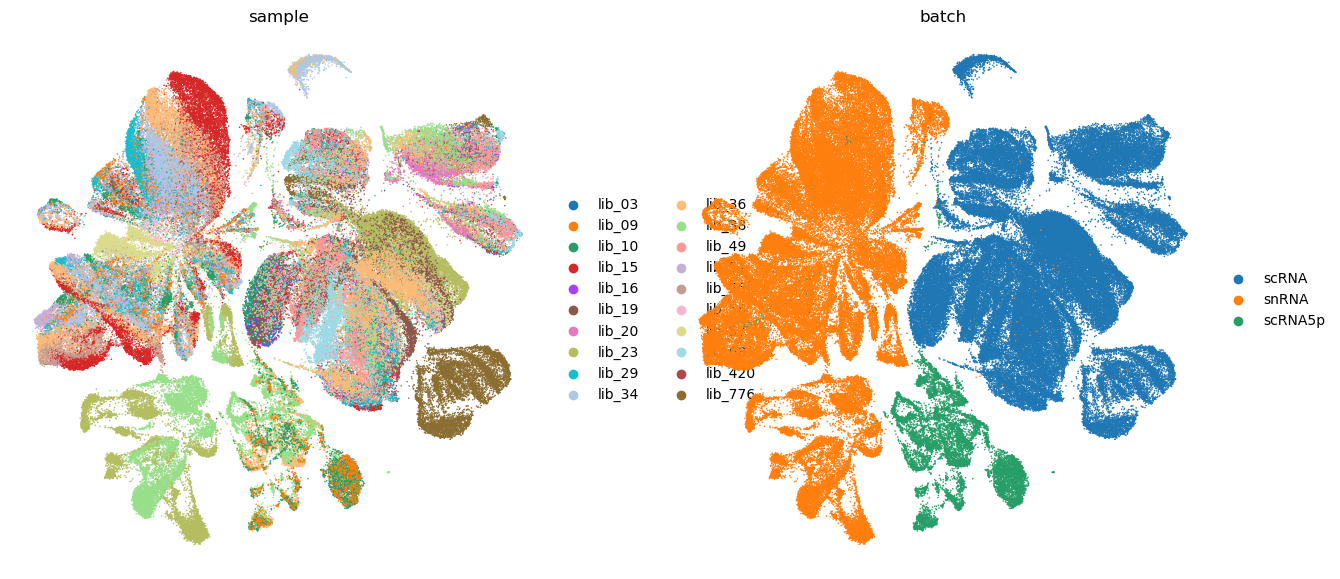

In [9]:
sc.pl.umap(adata, color = ['sample','batch'], frameon = False, size = 5)

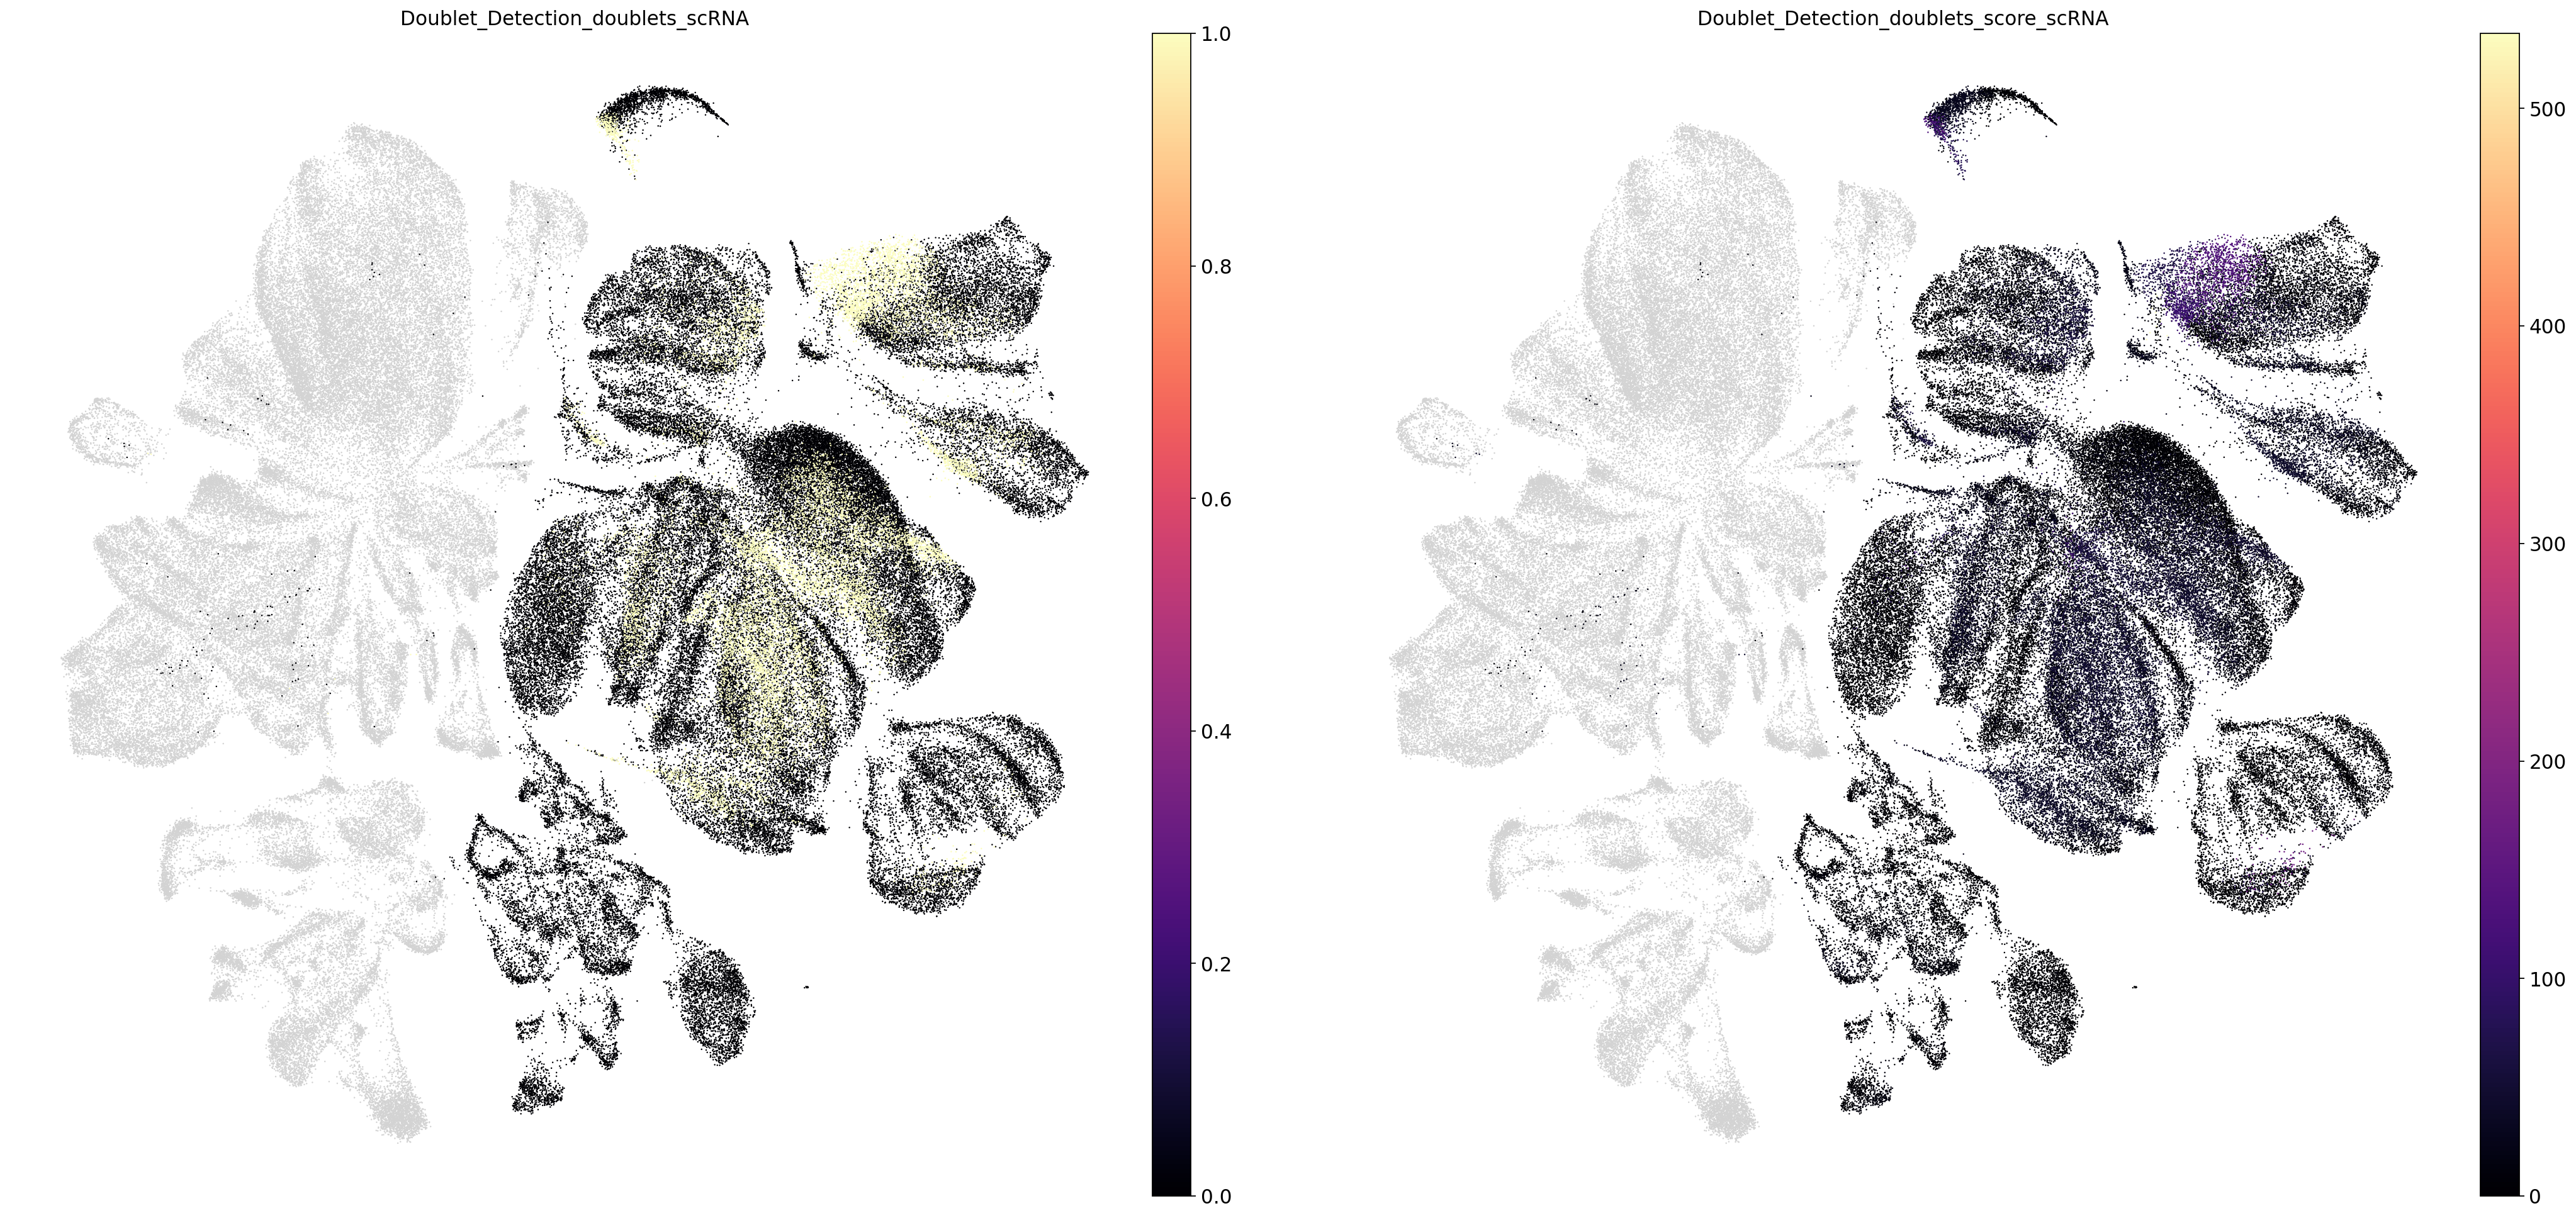

In [31]:
sc.pl.umap(adata, color = ['Doublet_Detection_doublets_scRNA','Doublet_Detection_doublets_score_scRNA'], frameon = False, size = 5)

In [ ]:
adata.write('objects/Integration_2ndQC_metadata.h5ad', compression='gzip')

## snATAC AMULET

In [7]:
adata = sc.read('objects/Integration_2ndQC_metadata.h5ad')

In [15]:
sample_list = []
for s in os.listdir('./../MULTIOME/data/'):
    if s.startswith('lib_'):
        sample_list.append(s)

In [33]:
aggr = pd.read_csv('./../MULTIOME/data/AGG/outs/aggr.csv')
aggr['sufix'] = aggr.index
aggr.index = aggr['library_id']

In [34]:
values = []
for i in sample_list:
    df = pd.read_csv(f'./../MULTIOME/scripts/AGG/ATAC/AMULET_outs/{i}/MultipletBarcodes_01.txt', sep='\t', header=None)
    df[0] = [b.split('-')[0]+'-'+str(aggr.loc[i,'sufix']+1)+'-snRNA' for b in df[0]]
    values += list(df[0])
    n_mul= pd.read_csv(f'./../MULTIOME/scripts/AGG/ATAC/AMULET_outs/{i}/MultipletSummary.txt', sep='\t', header=None).iloc[2][1]
    percent= pd.read_csv(f'./../MULTIOME/scripts/AGG/ATAC/AMULET_outs/{i}/MultipletSummary.txt', sep='\t', header=None).iloc[3][1]

    print(f'AMULET doublets detection: {i} Number of Multiplets: {n_mul} // Percent of daoublets: {percent}%')

AMULET doublets detection: lib_09 Number of Multiplets: 259.0 // Percent of daoublets: 4.898808397957254%
AMULET doublets detection: lib_55 Number of Multiplets: 321.0 // Percent of daoublets: 4.161265232045631%
AMULET doublets detection: lib_54 Number of Multiplets: 229.0 // Percent of daoublets: 5.720709467899075%
AMULET doublets detection: lib_34 Number of Multiplets: 150.0 // Percent of daoublets: 1.5476681799422205%
AMULET doublets detection: lib_15 Number of Multiplets: 545.0 // Percent of daoublets: 4.9307880213516695%
AMULET doublets detection: lib_29 Number of Multiplets: 285.0 // Percent of daoublets: 4.221596800474003%
AMULET doublets detection: lib_56 Number of Multiplets: 186.0 // Percent of daoublets: 1.435628280333436%
AMULET doublets detection: lib_23 Number of Multiplets: 395.0 // Percent of daoublets: 3.952371422853712%
AMULET doublets detection: lib_38 Number of Multiplets: 319.0 // Percent of daoublets: 3.680627668166609%
AMULET doublets detection: lib_36 Number of 

In [35]:
adata.obs['AMULET_doublets'] = [i in values for i in adata.obs.index]
print(np.sum(adata.obs['AMULET_doublets']))
adata.obs['AMULET_doublets'] = adata.obs['AMULET_doublets'].astype('category')

3005


In [36]:
adata

AnnData object with n_obs × n_vars = 179290 × 38224
    obs: 'sample', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Deepscore_external', 'Doublet_Detection_doublets_scRNA', 'Doublet_Detection_doublets_score_scRNA', 'Doublet_Detection_doublets_scRNA5p', 'Doublet_Detection_doublets_score_scRNA5p', 'AMULET_doublets'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'sample_colors', 'batch_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [37]:
values = []
df_list=[]
for i in sample_list:
    df_ = pd.read_csv(f'./../MULTIOME/scripts/AGG/ATAC/AMULET_outs/{i}/MultipletProbabilities.txt', sep='\t', header=0)
    df_.index=df_['barcode'].copy()
    a = df_['barcode']
    a = [b.split('-')[0]+'-'+str(aggr.loc[i,'sufix']+1)+'-snRNA' for b in a]
    df_.index=a
    df_list.append(df_)


In [38]:
am_df = pd.concat(df_list)
am_df = am_df[am_df.index.isin(adata.obs.index)]

In [39]:
adata.obs.loc[am_df.index,'AMULET_pval'] = am_df['p-value']
adata.obs.loc[am_df.index,'AMULET_qval'] = am_df['q-value']

In [40]:
adata.write('objects/Integration_2ndQC_metadata.h5ad', compression='gzip')

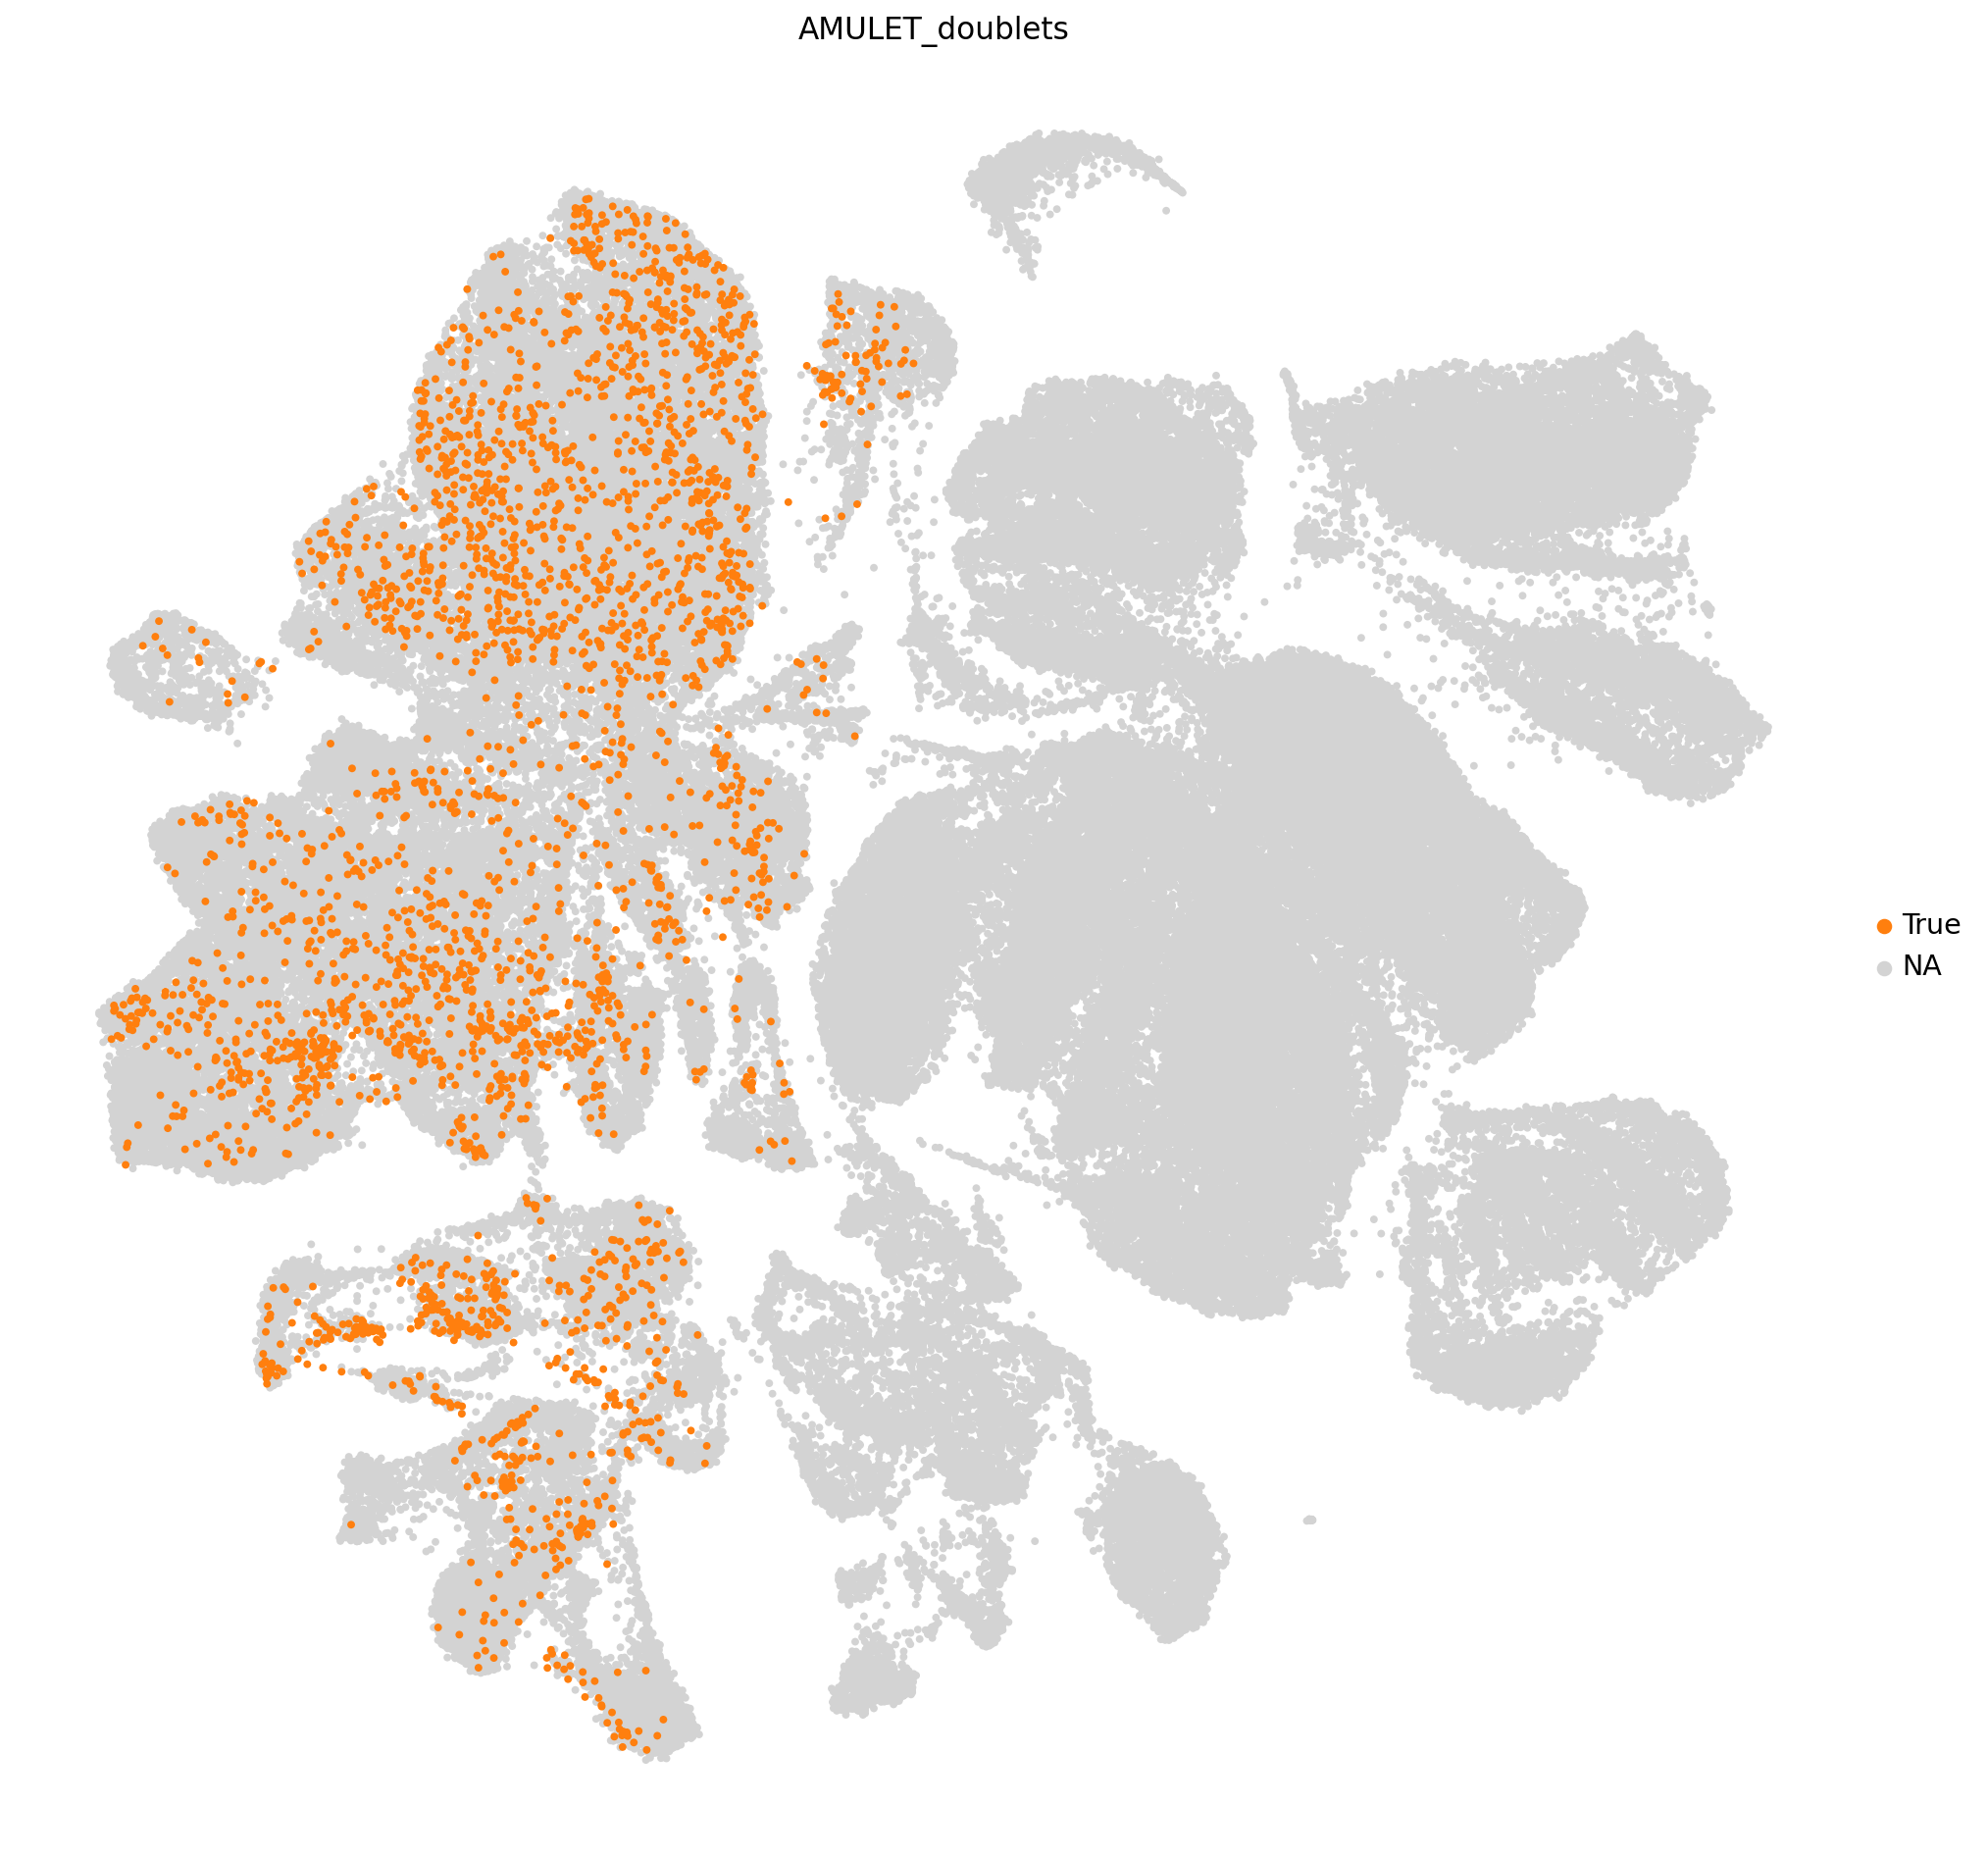

In [41]:
sc.pl.umap(adata, color = ['AMULET_doublets'], frameon = False, size = 50, groups=[True])

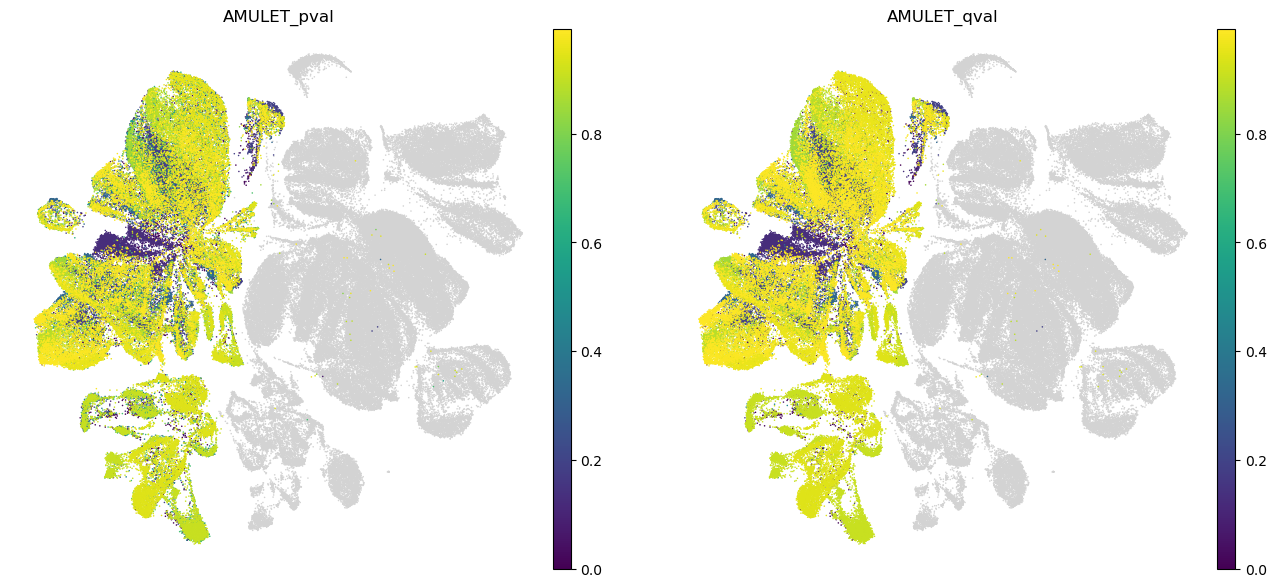

In [10]:
sc.pl.umap(adata, color = ['AMULET_pval','AMULET_qval'], frameon = False, size = 5, groups=[True])

## snRNA DoubletDetection

In [6]:
adata = sc.read('objects/Integration_2ndQC_metadata.h5ad')

In [7]:
sample_list = []
for s in os.listdir('./../MULTIOME/data/'):
    if s.startswith('lib_'):
        sample_list.append(s)

In [8]:
adata[adata.obs['batch'].isin(['snRNA'])][adata[adata.obs['batch'].isin(['snRNA'])].obs['sample'].isin(['lib_09'])].obs.index

Index(['AAGTTTGTCCGCACAA-1-snRNA', 'ACAACACTCATTTGTC-1-snRNA',
       'AGCACTTAGTTCCCGT-1-snRNA', 'AGCTTAATCGGTCAAT-1-snRNA',
       'CAAACAACATACTCCT-1-snRNA', 'CAACAATGTGCGCGTA-1-snRNA',
       'CAATGACTCGTGCCTT-1-snRNA', 'CGATTATCAAGTTATC-1-snRNA',
       'CTTCAATTCGTTAGTA-1-snRNA', 'GCCTCCATCCATCAGG-1-snRNA',
       ...
       'TTTGACCGTCATAAGT-1-snRNA', 'TTTGACTTCGTTACAA-1-snRNA',
       'TTTGAGTCACAGGAAT-1-snRNA', 'TTTGCATTCCAATTAG-1-snRNA',
       'TTTGCATTCGCTAAAC-1-snRNA', 'TTTGCGACAAACGCGA-1-snRNA',
       'TTTGCGGAGATACTTG-1-snRNA', 'TTTGCGGAGCAAGACA-1-snRNA',
       'TTTGTGTTCATTTAGG-1-snRNA', 'TTTGTTGGTCATGAGC-1-snRNA'],
      dtype='object', length=3901)

In [9]:
adata[adata.obs['batch'].isin(['snRNA'])].obs['sample'].value_counts()

lib_15    10826
lib_23     9942
lib_36     9483
lib_34     9425
lib_38     8437
lib_55     7095
lib_29     6020
lib_51     5985
lib_57     4666
lib_09     3901
lib_10     2839
lib_56      359
Name: sample, dtype: int64

In [10]:
sample_list.remove('lib_54')

In [11]:
for i in sample_list:
    adata_ = sc.read(f'../MULTIOME/scripts/AGG/RNA/objects/doubletdetection_{i}.h5ad')
    lib_number= adata[adata.obs['batch'].isin(['snRNA'])][adata[adata.obs['batch'].isin(['snRNA'])].obs['sample'].isin([i])].obs.index[0].split('-')[1]
    print(i, lib_number)
    adata_.obs.index = [index.split('-')[0] + '-' + lib_number + '-' + 'snRNA' for index in adata_.obs.index]
    adata_ = adata_[adata_.obs.index.isin(adata.obs.index)]
    print(adata_.obs['doublets'].sum())
    adata.obs.loc[adata_.obs.index,'Doublet_Detection_doublets_snRNA'] = adata_.obs['doublets'].tolist()
    # adata.obs['singlets'] = ~doublets.astype(bool)
    adata.obs.loc[adata_.obs.index,'Doublet_Detection_doublets_score_snRNA'] = adata_.obs['doublets_score'].tolist()
    del adata_
    # adata.obs.loc[adata[adata.obs['sample'].isin([sample_code_dict[i]])].obs.index,'doublets_score'] = adata_.obs['doublets_score'].tolist()


lib_09 1
0.0
lib_55 11
168.0
lib_34 6
32.0
lib_15 3
860.0
lib_29 5
32.0
lib_56 12
8.0
lib_23 4
866.0
lib_38 8
541.0
lib_36 7
442.0
lib_51 9
0.0
lib_57 13
713.0
lib_10 2
0.0


In [12]:
adata.write('objects/Integration_2ndQC_metadata.h5ad', compression='gzip')

In [37]:
adata

AnnData object with n_obs × n_vars = 144909 × 38233
    obs: 'sample', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'Deepscore_external', 'doublets', 'Doublet_Detection_doublets_scRNA', 'Doublet_Detection_doublets_score_scRNA', 'AMULET_doublets', 'AMULET_pval', 'AMULET_qval'
    uns: 'AMULET_doublets_colors', 'batch_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'